In [54]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as shp

In [55]:
cbsa = gpd.read_file(r"data\tl_2018_us_cbsa\tl_2018_us_cbsa.shp")

<AxesSubplot:>

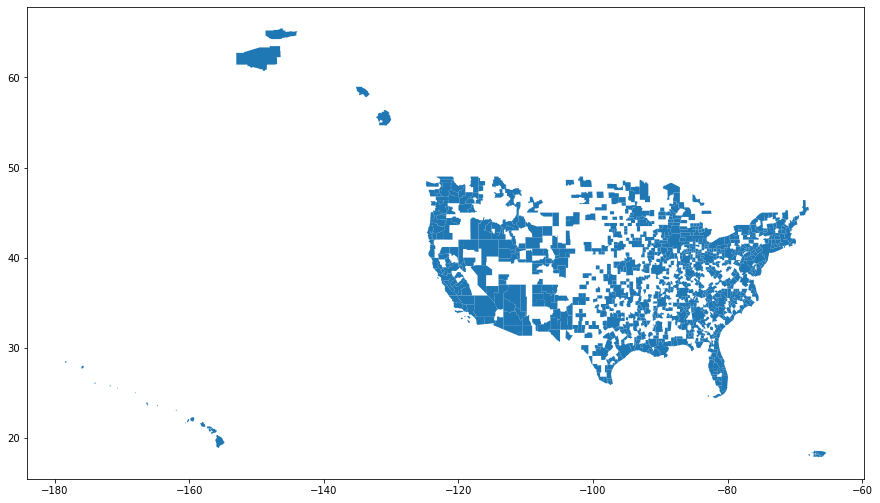

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa.plot(ax=ax)

<AxesSubplot:>

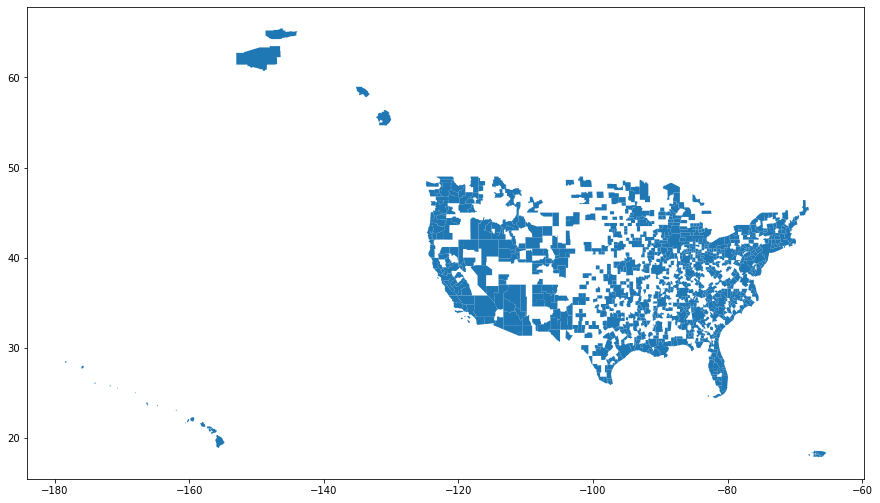

In [57]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa.plot(ax=ax)

In [58]:
cbsa["NAMELSAD"].str.split().str[-2]

0      Metro
1      Metro
2      Metro
3      Metro
4      Micro
       ...  
940    Micro
941    Micro
942    Micro
943    Micro
944    Micro
Name: NAMELSAD, Length: 945, dtype: object

In [59]:
cbsa["type"] = cbsa["NAMELSAD"].str.split().str[-2]

In [60]:
cbsa["INTPTLAT"] = cbsa["INTPTLAT"].str.strip("+").astype(float)
cbsa["INTPTLON"] = cbsa["INTPTLON"].str.strip("+").astype(float)

In [61]:
cbsa = cbsa.set_index("NAME")

In [62]:
# https://en.wikipedia.org/wiki/List_of_core-based_statistical_areas, greater than 2M
cbsa.loc["New York-Newark-Jersey City, NY-NJ-PA", "type"] = "T34"
cbsa.loc["Los Angeles-Long Beach-Anaheim, CA", "type"] = "T34"
cbsa.loc["Chicago-Naperville-Elgin, IL-IN-WI", "type"] = "T34"
cbsa.loc["Dallas-Fort Worth-Arlington, TX", "type"] = "T34"
cbsa.loc["Houston-The Woodlands-Sugar Land, TX", "type"] = "T34"
cbsa.loc["Washington-Arlington-Alexandria, DC-VA-MD-WV", "type"] = "T34"
cbsa.loc["Miami-Fort Lauderdale-West Palm Beach, FL", "type"] = "T34"
cbsa.loc["Philadelphia-Camden-Wilmington, PA-NJ-DE-MD", "type"] = "T34"
cbsa.loc["Atlanta-Sandy Springs-Roswell, GA", "type"] = "T34"
cbsa.loc["Phoenix-Mesa-Scottsdale, AZ", "type"] = "T34"
cbsa.loc["Boston-Cambridge-Newton, MA-NH", "type"] = "T34"
cbsa.loc["San Francisco-Oakland-Hayward, CA", "type"] = "T34"
cbsa.loc["Riverside-San Bernardino-Ontario, CA", "type"] = "T34"
cbsa.loc["Detroit-Warren-Dearborn, MI", "type"] = "T34"
cbsa.loc["Seattle-Tacoma-Bellevue, WA", "type"] = "T34"
cbsa.loc["Minneapolis-St. Paul-Bloomington, MN-WI", "type"] = "T34"
cbsa.loc["San Diego-Carlsbad, CA", "type"] = "T34"
cbsa.loc["Tampa-St. Petersburg-Clearwater, FL", "type"] = "T34"
cbsa.loc["Denver-Aurora-Lakewood, CO", "type"] = "T34"
cbsa.loc["St. Louis, MO-IL", "type"] = "T34"
cbsa.loc["Baltimore-Columbia-Towson, MD", "type"] = "T34"
cbsa.loc["Charlotte-Concord-Gastonia, NC-SC", "type"] = "T34"
cbsa.loc["Orlando-Kissimmee-Sanford, FL", "type"] = "T34"
cbsa.loc["San Antonio-New Braunfels, TX", "type"] = "T34"
cbsa.loc["Portland-Vancouver-Hillsboro, OR-WA", "type"] = "T34"
cbsa.loc["Sacramento--Roseville--Arden-Arcade, CA", "type"] = "T34"
cbsa.loc["Las Vegas-Henderson-Paradise, NV", "type"] = "T34"
cbsa.loc["Pittsburgh, PA", "type"] = "T34"
cbsa.loc["Austin-Round Rock, TX", "type"] = "T34"
cbsa.loc["Cincinnati, OH-KY-IN", "type"] = "T34"
cbsa.loc["Kansas City, MO-KS", "type"] = "T34"
cbsa.loc["Columbus, OH", "type"] = "T34"
cbsa.loc["Indianapolis-Carmel-Anderson, IN", "type"] = "T34"
cbsa.loc["Cleveland-Elyria, OH", "type"] = "T34"

<AxesSubplot:>

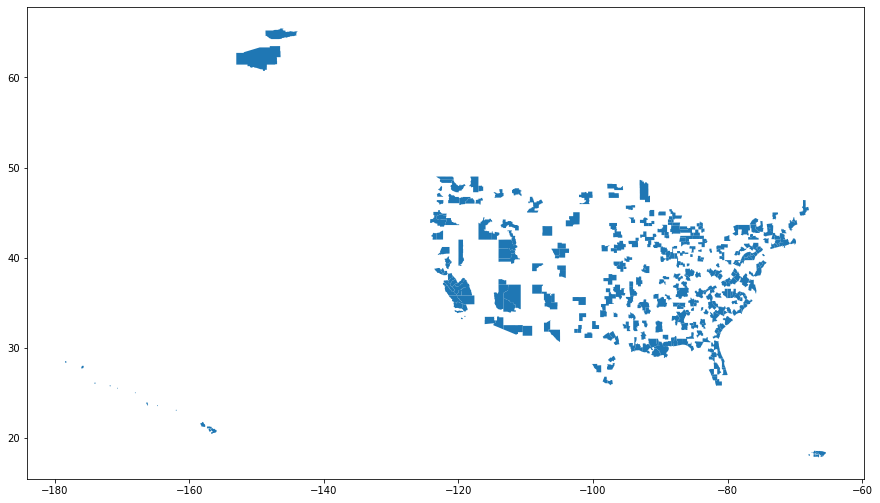

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa[cbsa["type"]=="Metro"].plot(ax=ax)

<AxesSubplot:>

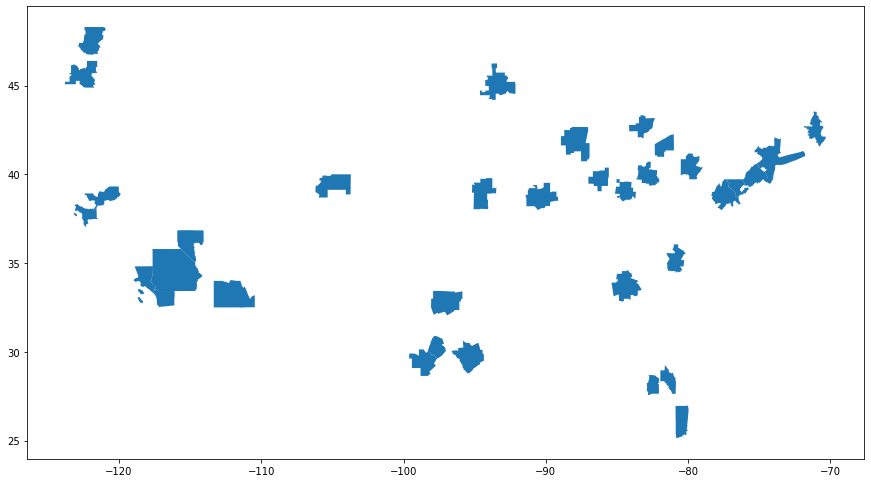

In [64]:
fig, ax = plt.subplots(figsize=(15, 15))
cbsa[cbsa["type"]=="T34"].plot(ax=ax)

In [65]:
us = gpd.read_file(r"..\data\pumas\ipums_puma_2010.shp")

In [66]:
cbsa = cbsa.to_crs(us.crs)

In [67]:
print(cbsa.crs)
print(us.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]
PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",

In [68]:
us["center"] = us["geometry"].centroid

In [73]:
for i, msa in cbsa.iterrows():
    print(i)
    for j, puma in us.iterrows():
        if msa["geometry"].contains(shp.Point(puma["center"])):
            us.loc[j, "type"] = msa["type"]

Rochester, MN
Raleigh, NC
Rapid City, SD
Rochester, NY
Raymondville, TX
Reading, PA
Red Bluff, CA
Redding, CA
Red Wing, MN
Reno, NV
Rexburg, ID
Richmond, IN
Richmond, VA
Richmond-Berea, KY
Rio Grande City, TX
Riverside-San Bernardino-Ontario, CA
Riverton, WY
Roanoke, VA
Roanoke Rapids, NC
Rochelle, IL
Rockford, IL
Rockingham, NC
Rock Springs, WY
Rocky Mount, NC
Rolla, MO
Rome, GA
Roseburg, OR
Roswell, NM
San Francisco-Oakland-Hayward, CA
Russellville, AR
Ruston, LA
Rutland, VT
Sacramento--Roseville--Arden-Arcade, CA
San Germán, PR
San Jose-Sunnyvale-Santa Clara, CA
Safford, AZ
Saginaw, MI
St. Cloud, MN
St. George, UT
St. Joseph, MO-KS
St. Louis, MO-IL
St. Marys, GA
Salem, OH
Salem, OR
Salina, KS
Salinas, CA
Salisbury, MD-DE
Salt Lake City, UT
San Angelo, TX
San Antonio-New Braunfels, TX
San Diego-Carlsbad, CA
Sandpoint, ID
Sandusky, OH
Sanford, NC
San Juan-Carolina-Caguas, PR
San Luis Obispo-Paso Robles-Arroyo Grande, CA
Santa Cruz-Watsonville, CA
Santa Fe, NM
Santa Isabel, PR
Santa Ma

In [75]:
us["type"].value_counts().sum()


2194

In [76]:
us.shape

(2378, 10)

In [77]:
us.drop("geometry", axis=1).to_csv("data/puma_density.csv")